# **Exploratory Data Analysis (EDA)**


Traducción a español y tropicalización: Tobias Alexander Santamaria Diaz

Dataset a utilizar: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/data

Objetivos del Proyecto:

Explorar un conjunto de datos bancarios con el framework Pandas.
Construir tablas dinámicas.
Visualizar el conjunto de datos con varios tipos de gráficos.

## Acerca del conjunto de datos

Contexto : Una gran tienda está planeando las rebajas de fin de año. Quieren lanzar una nueva oferta: la membresía Gold, que ofrece un 20 % de descuento en todas las compras, por solo $ 499,  $ que es de$ $ 999 los demás días. Será válida solo para los clientes existentes y actualmente se está planificando la campaña a través de llamadas telefónicas para ellos. La gerencia cree que la mejor manera de reducir el costo de la campaña es crear un modelo predictivo que clasifique a los clientes que podrían comprar la oferta.

## Librerias

Importando las bibliotecas necesarias para este proyecto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

Cargamos los datos y definimos DataFrame. Leamos los datos y veamos las primeras 5 filas usando el método head.

In [3]:
df = pd.read_csv("./datasets/superstore_data.csv")
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


## Revisemos el tamaño del Dataset, sus columnas y los tipos de datos

In [4]:
df.shape
df.tail(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.00,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.00,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.00,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.00,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.00,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


## Nombres de cada Columna

In [5]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Diccionario:

La descripción de los datos es la siguiente:

1. `Response` (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. `ID` - Unique ID of each customer
3. `Year_Birth` - Age of the customer
4. `Complain` - 1 if the customer complained in the last 2 years
5. `Dt_Customer` - date of customer's enrollment with the company
6. `Education` - customer's level of education
7. `Marital` - customer's marital status
8. `Kidhome` - number of small children in customer's household
9. `Teenhome` - number of teenagers in customer's household
10. `Income` - customer's yearly household income
11. `MntFishProducts` - the amount spent on fish products in the last 2 years
12. `MntMeatProducts` - the amount spent on meat products in the last 2 years
13. `MntFruits` - the amount spent on fruits products in the last 2 years
14. `MntSweetProducts` - amount spent on sweet products in the last 2 years
15. `MntWines` - the amount spent on wine products in the last 2 years
16. `MntGoldProds` - the amount spent on gold products in the last 2 years
14. `NumDealsPurchases` - number of purchases made with discount
15. `NumCatalogPurchases` - number of purchases made using catalog (buying goods to be shipped through the mail)
16. `NumStorePurchases` - number of purchases made directly in stores
17. `NumWebPurchases` - number of purchases made through the company's website
18. `NumWebVisitsMonth` - number of visits to company's website in the last month
19. `Recency` - number of days since the last purchase

Se visualiza la inforacion de todas las columnas del Dataframe 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

El Dataframe se encuentra con  `2240 non-null` significa que la columna tiene 2,240 valores no nulos y que el tipo de datos de la columna es int64, lo que generalmente indica que los datos son de tipo entero (integer).

Ademas podemos visualizar las palabras non-null, esto nos indica que siempre tendra valores. El dataset contiene 18 atributos de tipo integer (int64), 1 real (float64) y 3 categoricos/binarios (object).


El método describe muestra un resumen estadistico de los valores numericos (int64 y float64): La cantidad de valores, media, Desviación estándar, el rango, min & max, y los cuartiles 0.25, 0.5 and 0.75.

In [7]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.15,0.01
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.36,0.10
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00


Para las columnas `NumWebPurchases` tiene el la cantidad de 27, comparada con las `NumStorePurchases` 13 indicando que el numero mayor de las compras se realizan mayormente desde el sitio web que en la tienda en fisico.

In [8]:
df.describe(include = ["object"])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,8/31/2012
freq,1127,864,12


Se puede observar que la mayor consentracion en la `Education` son los `Graduation` con un `Material_Status` de `Married` 

In [9]:
df["Marital_Status"].value_counts(normalize = True)

Marital_Status
Married    0.39
Together   0.26
Single     0.21
Divorced   0.10
Widow      0.03
Alone      0.00
YOLO       0.00
Absurd     0.00
Name: proportion, dtype: float64

El estado civil de los cleintes es mayormente `Married` con un 39%(0.39)

In [10]:
df["Education"].value_counts(normalize = True)

Education
Graduation   0.50
PhD          0.22
Master       0.17
2n Cycle     0.09
Basic        0.02
Name: proportion, dtype: float64

El nivel de estudio de los clientes es mayormente `Graduation` con un 50%(0.50)

### Ordenando el Dataset

Un `DataFrame` se puede ordenar por varios valores de columna. En nuestro caso, por ejemplo, por `duration` (`ascending = False` para ordenar en forma descendente):

In [11]:
df.sort_values(by = "NumWebPurchases", ascending = False).head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
210,4619,1945,PhD,Single,113734.00,0,0,5/28/2014,9,6,...,1,262,3,0,27,0,0,1,0,0
14,10311,1969,Graduation,Married,4428.00,0,1,5/10/2013,0,16,...,2,4,321,0,25,0,0,1,0,0
2063,6237,1966,PhD,Single,7144.00,0,2,7/12/2013,92,81,...,5,2,291,0,23,1,1,0,0,0
1425,8727,1978,Graduation,Divorced,63693.00,0,1,10/14/2013,63,587,...,42,87,54,3,11,6,9,6,0,0


In [12]:
pd.options.display.max_columns = 0

In [13]:
df.sort_values(by = ["Response", "NumDealsPurchases", "NumWebPurchases"], ascending = [False, False, False]).head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
334,3678,1973,Graduation,Widow,60208.00,1,1,7/10/2012,13,488,23,71,15,0,59,11,8,3,7,7,1,0
1262,531,1954,PhD,Divorced,57333.00,0,1,9/22/2012,55,941,14,397,76,58,176,11,8,5,9,6,1,0
106,873,1949,Master,Married,62845.00,1,1,1/10/2012,3,1099,0,45,0,0,34,11,3,4,10,8,1,0
944,5207,1963,PhD,Married,53378.00,1,1,9/24/2012,41,489,6,152,8,6,132,10,9,4,6,8,1,0
400,3478,1971,PhD,Married,60585.00,1,1,6/24/2013,17,267,42,309,55,42,21,10,7,4,9,5,1,0
269,967,1976,Graduation,Married,46049.00,1,1,7/21/2013,11,342,9,112,19,14,19,10,5,2,9,7,1,0
263,2552,1955,PhD,Single,55521.00,1,2,10/22/2013,11,416,0,26,0,0,4,9,6,3,6,7,1,0
713,6798,1966,Graduation,Single,37070.00,1,1,3/20/2013,30,231,7,137,4,15,39,9,5,1,8,7,1,0
714,4168,1966,Graduation,Single,37070.00,1,1,3/20/2013,30,231,7,137,4,15,39,9,5,1,8,7,1,0
226,8897,1965,Graduation,Single,42720.00,1,1,4/24/2013,9,392,5,91,28,26,112,8,7,3,7,8,1,0


Se observa que el numero de compras con ofertas es `11` aceptandoe la campaña de descuento, viendo con el numero de compras realizadas por el sitio web (`NumWebPurchases`) se observa, que aun asi se realizan compras casi igual la cantidad de compras en la tienda en Fisico (`NumStorePurchases`) prefiriendo ir personalmente a realizar las compras.

In [14]:
df.sort_values(by = ["Response","NumDealsPurchases", "NumStorePurchases"], ascending = [False, False, False]).head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
106,873,1949,Master,Married,62845.00,1,1,1/10/2012,3,1099,0,45,0,0,34,11,3,4,10,8,1,0
1262,531,1954,PhD,Divorced,57333.00,0,1,9/22/2012,55,941,14,397,76,58,176,11,8,5,9,6,1,0
334,3678,1973,Graduation,Widow,60208.00,1,1,7/10/2012,13,488,23,71,15,0,59,11,8,3,7,7,1,0
269,967,1976,Graduation,Married,46049.00,1,1,7/21/2013,11,342,9,112,19,14,19,10,5,2,9,7,1,0
400,3478,1971,PhD,Married,60585.00,1,1,6/24/2013,17,267,42,309,55,42,21,10,7,4,9,5,1,0
944,5207,1963,PhD,Married,53378.00,1,1,9/24/2012,41,489,6,152,8,6,132,10,9,4,6,8,1,0
713,6798,1966,Graduation,Single,37070.00,1,1,3/20/2013,30,231,7,137,4,15,39,9,5,1,8,7,1,0
714,4168,1966,Graduation,Single,37070.00,1,1,3/20/2013,30,231,7,137,4,15,39,9,5,1,8,7,1,0
263,2552,1955,PhD,Single,55521.00,1,2,10/22/2013,11,416,0,26,0,0,4,9,6,3,6,7,1,0
226,8897,1965,Graduation,Single,42720.00,1,1,4/24/2013,9,392,5,91,28,26,112,8,7,3,7,8,1,0


Se observa la misma tendencia que el numero de compras con ofertas es `11` aceptandoe la campaña de descuento, viendo con el numero de compras realizadas por el sitio web (`NumWebPurchases`), se observa que aun asi las compras realizadas en la tienda en Fisico (`NumStorePurchases`) son casi iguales prefiriendo ir personalmente a realizar las compras.

### Aplicación de funciones:.

#### `apply` permite pasar una función y aplicarla en una columna específica dentro de un Dataframe o una Serie

In [15]:
df.apply(np.max)

Id                        11191
Year_Birth                 1996
Education                   PhD
Marital_Status             YOLO
Income                666666.00
Kidhome                       2
Teenhome                      2
Dt_Customer            9/9/2013
Recency                      99
MntWines                   1493
MntFruits                   199
MntMeatProducts            1725
MntFishProducts             259
MntSweetProducts            263
MntGoldProds                362
NumDealsPurchases            15
NumWebPurchases              27
NumCatalogPurchases          28
NumStorePurchases            13
NumWebVisitsMonth            20
Response                      1
Complain                      1
dtype: object

El cliente mas joven por su año de nacimiento es (`Year_Birth` = 1996), tiene mayor numero de compras realizadas por catalogo (28) `NumCatalogPurchases` que las compras realizadas en el sitio web (27) o en la tienda en fisico(13)


In [16]:
print("Porcentaje de clientes que tomo el producto ofrecido =", '{:.1%}'.format(df["Response"].mean()))

Porcentaje de clientes que tomo el producto ofrecido = 14.9%


In [17]:
acd = round(df[df["Response"] == 1]["NumDealsPurchases"].mean(), 2)
##acd_in_min = acd // 15
print("EL promedio de la Cantidad de productos comprados en oferta y que si aceptaron la campaña de ofertas =", acd)

EL promedio de la Cantidad de productos comprados en oferta y que si aceptaron la campaña de ofertas = 2.34


In [18]:
media = df['MntFruits'].mean()
print(f"La media de ingreso anual por familia es: {media}")

La media de ingreso anual por familia es: 26.302232142857143


Es la categoria que menos se compra por familia

In [19]:
moda = df['Education'].mode()[0]
print(f"La moda de nivel academico es: {moda}")

La moda de nivel academico es: Graduation


In [20]:
df[-1:]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2239,4070,1969,PhD,Married,94871.00,0,2,1/9/2012,99,169,24,553,188,0,144,1,8,5,4,7,1,0


## Pivot tables

In [21]:
pd.crosstab(df["Response"], df["Education"])

Education,2n Cycle,Basic,Graduation,Master,PhD
Response,,,,,
0,181,52,975,313,385
1,22,2,152,57,101


El resultado muesta el nivel academico quienes SI(`1`) aceptaron la oferta de la campaña y lo que NO(`2`). El numero mayor que aceptan estas ofertas son lo que estan `Graduation` (`152`) al igual son a mayor cantidad de quienes no acaptaron la campaña de oferta con (`975`)

In [22]:
pd.crosstab(df["Response"], df["Marital_Status"])

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Response,,,,,,,,
0,1,2,184,766,374,520,58,1
1,1,1,48,98,106,60,19,1


El resultado muesta el estado civil quienes SI(`1`) aceptaron la oferta de la campaña y lo que NO(`0`). El numero mayor que aceptan estas ofertas son lo que los `Sinlge`(`106`), y los que no tomaron la campaña mayormente son los `Married`(`766`)

In [23]:
df.pivot_table(
    ["NumDealsPurchases", "NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"],
    ["Education"],
    aggfunc = "mean",
).head(10)

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Education,,,,
2n Cycle,2.32,2.25,5.51,3.73
Basic,0.48,1.80,2.85,1.89
Graduation,2.73,2.31,5.83,4.13
Master,2.57,2.43,5.90,4.03
PhD,2.97,2.37,6.06,4.42


La media de productos comprado por el nivel academico en la cateogria de: `Oferta (NumDealsPurchases)`, `Por catalogo(NumCatalogPurchases)`, `en la tienda(NumStorePurchases)` y `desde sitio web(NumWebPurchases)`

## visualización en Pandas

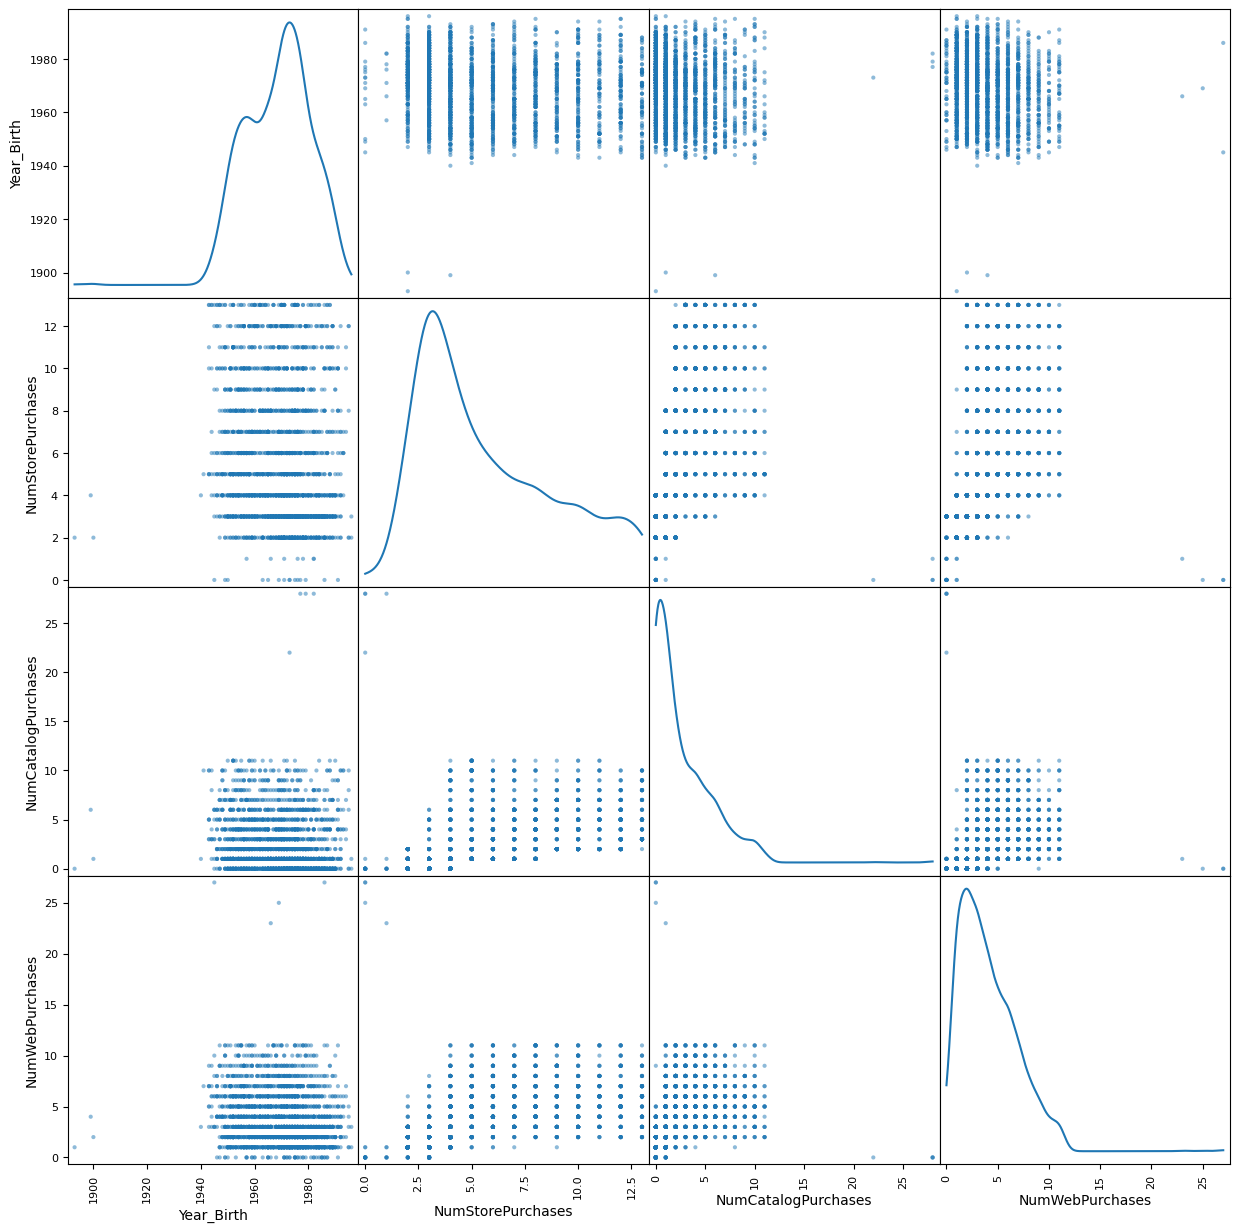

In [24]:
pd.plotting.scatter_matrix(
    df[["Year_Birth", "NumStorePurchases", "NumCatalogPurchases", "NumWebPurchases"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

La relacion de compras realizadas en `la tienda`, `Catalogo` y `Sitio web` con respeto al año de nacimiento de cada cliente

<Axes: >

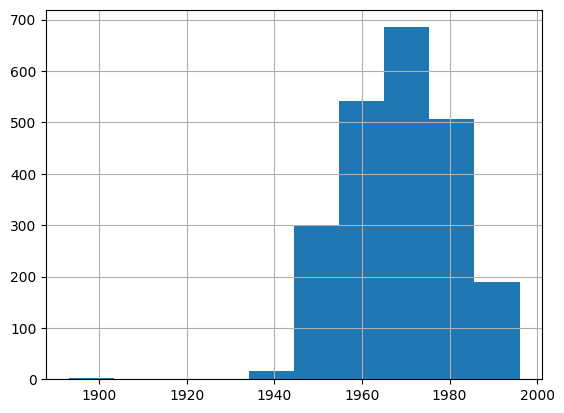

In [25]:
df["Year_Birth"].hist()

La mayoria de clientes estan en el rango de naciemto del año `1965 a 1975`

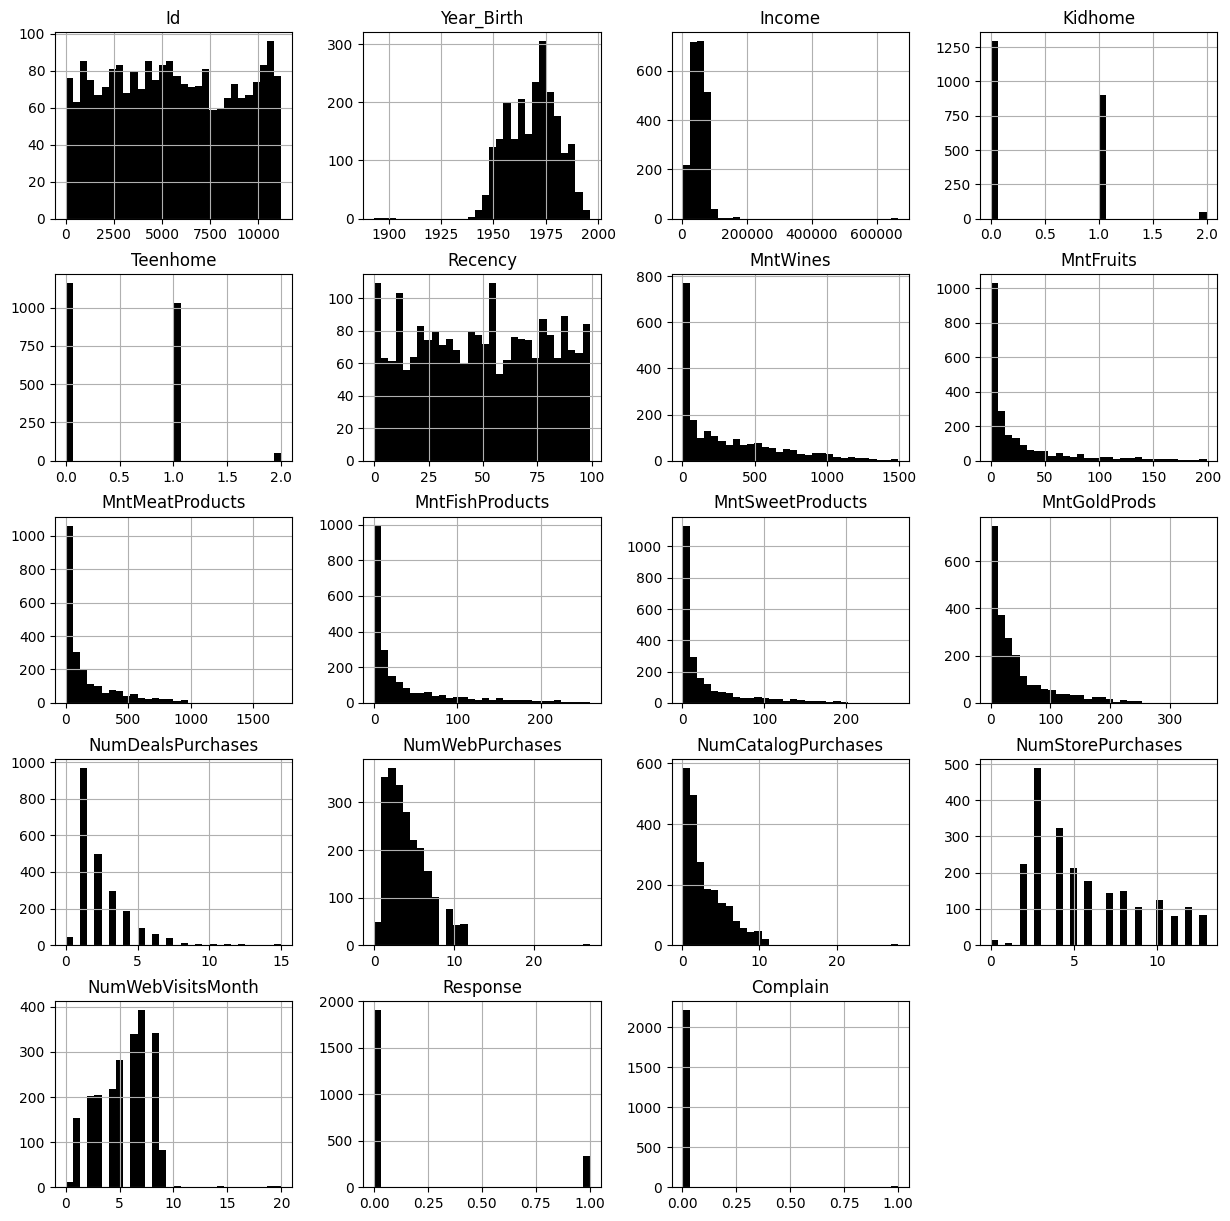

In [26]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 15))
plt.show()

Se muestra las tablas con valores para ver el movimiento de productos comprados por su categoria

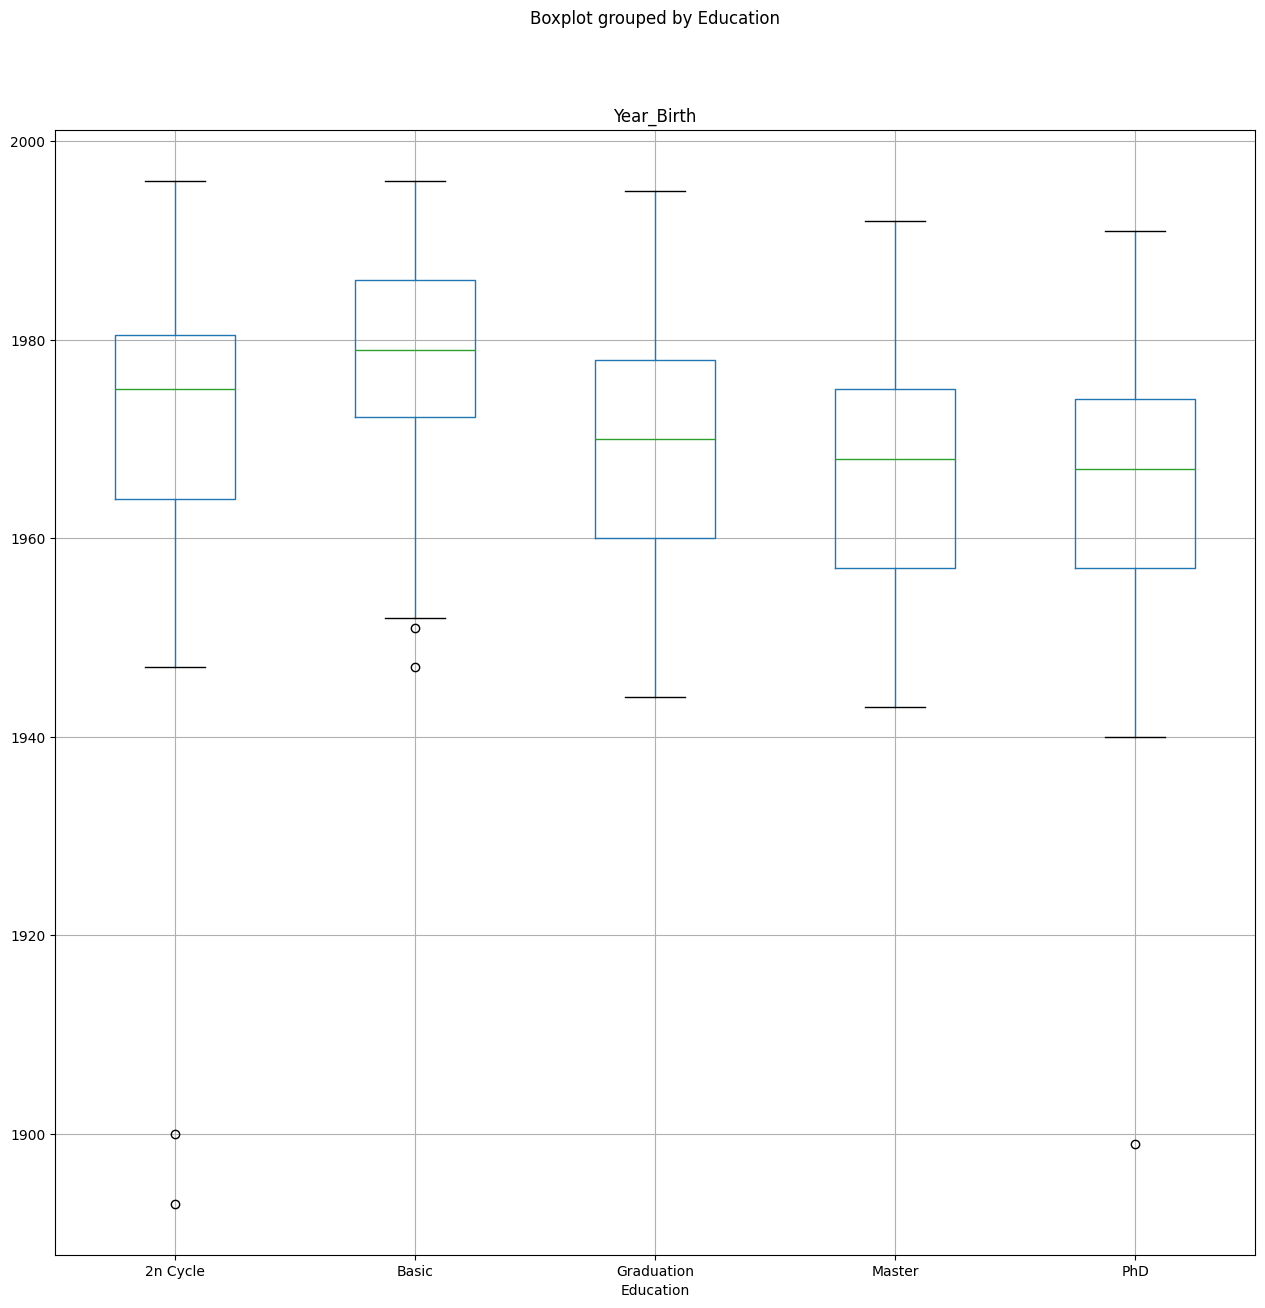

In [27]:
df.boxplot(column = "Year_Birth",
  by = "Education",
  figsize = (15, 15))
plt.show()

Diagrama de la caja para una relacion del año de nacimiento de los clientes con el nivel academico.